In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
from pathlib import Path
import matplotlib.pyplot as plt


from td.trackdata.dataset import TrackData
import plotly_express as px
import plotly.graph_objects as go
import torch 

import lightning as L

from td.model.model_pl import TrackGeneratorL 
from torch.utils.data import DataLoader
import numpy as np
from td.utils.cfg import UserConfig

In [12]:
user_cfg = UserConfig("mohit").user_cfg

In [37]:
train_dataset = TrackData(user_cfg, fold="train")
test_dataset = TrackData(user_cfg, fold="test")
valid_dataset = TrackData(user_cfg, fold="valid")

train_dl = DataLoader(train_dataset, batch_size=128)
test_dl = DataLoader(test_dataset, batch_size=128)
valid_dl = DataLoader(valid_dataset, batch_size=128)

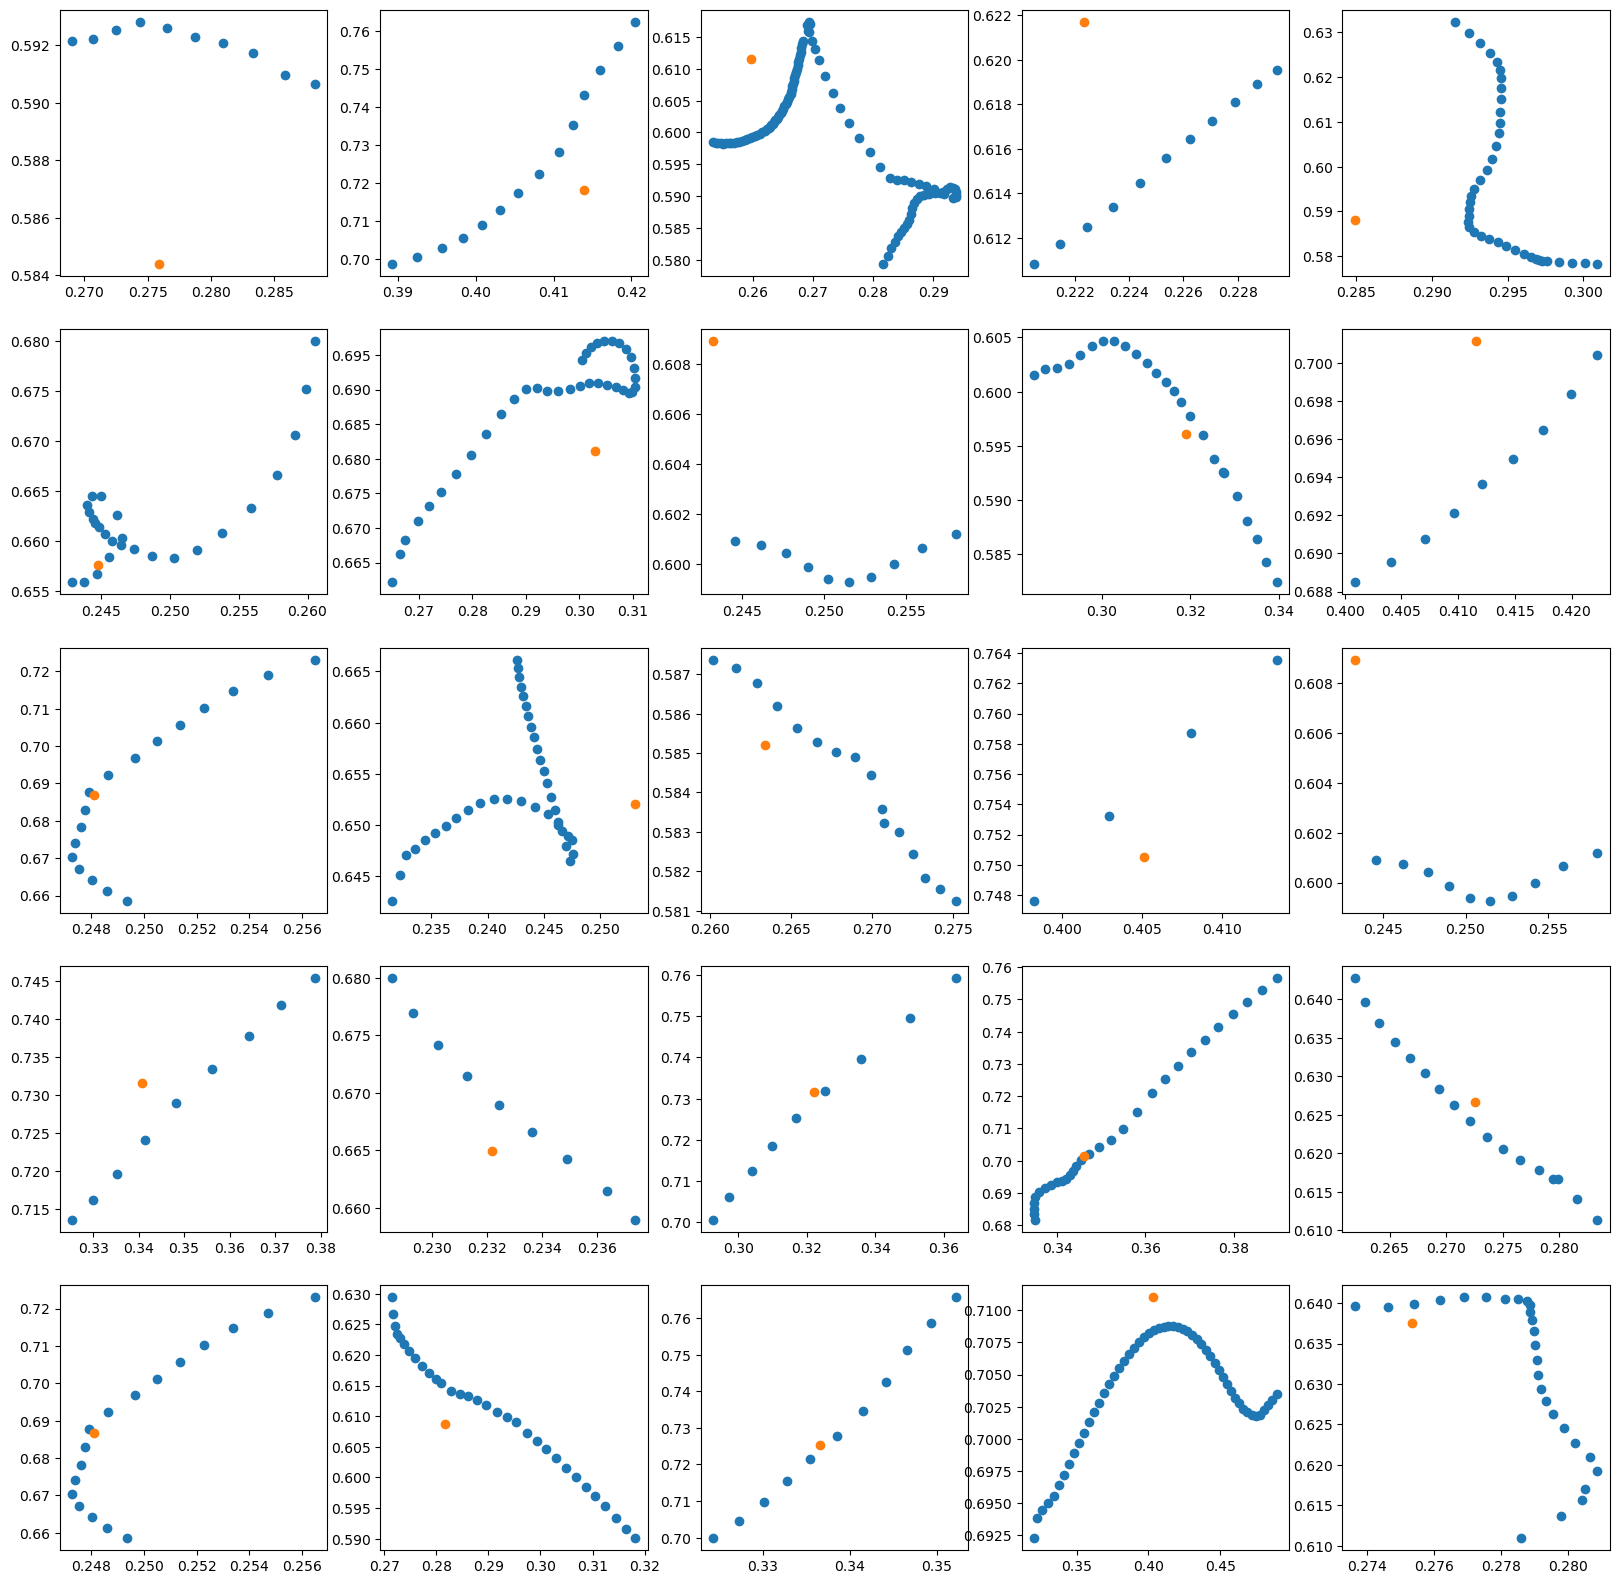

In [41]:
batch_size = 128
x, y = next(iter(train_dl))

fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    for j in range(5):
        ind = np.random.randint(0, batch_size)
        ax[i, j].scatter(y[ind][0].numpy(), y[ind][1].numpy())
        ax[i, j].scatter(x[ind][2].numpy(), x[ind][3].numpy())

In [42]:
model = TrackGeneratorL()

In [43]:
trainer = L.Trainer(accelerator="gpu", max_epochs=2)

/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mila/m/mohit.anand/miniforge3/envs/forest_mssl ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [44]:
trainer.fit(model=model, train_dataloaders=train_dl, val_dataloaders=valid_dl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

  | Name  | Type           | Params | Mode 
-------------------------------------------------
0 | model | TrackGenerator | 2.2 M  | train
-------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.967     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [45]:
y_list = []
y_hat_list = []
logit_pred_list = []
for i, batch in enumerate(test_dl):
    x,y = batch
    y_hat, logit_pred = model(x)
    y_list.append(y)
    y_hat_list.append(y_hat)
    logit_pred_list.append(logit_pred)

In [46]:
y_hat = torch.cat(y_hat_list, dim=0)
y = torch.cat(y_list, dim=0)
logit_pred = torch.cat(logit_pred_list, dim=0)
print(y.shape, y_hat.shape, logit_pred.shape)

torch.Size([6872, 6, 200]) torch.Size([6872, 200, 6]) torch.Size([6872, 200])


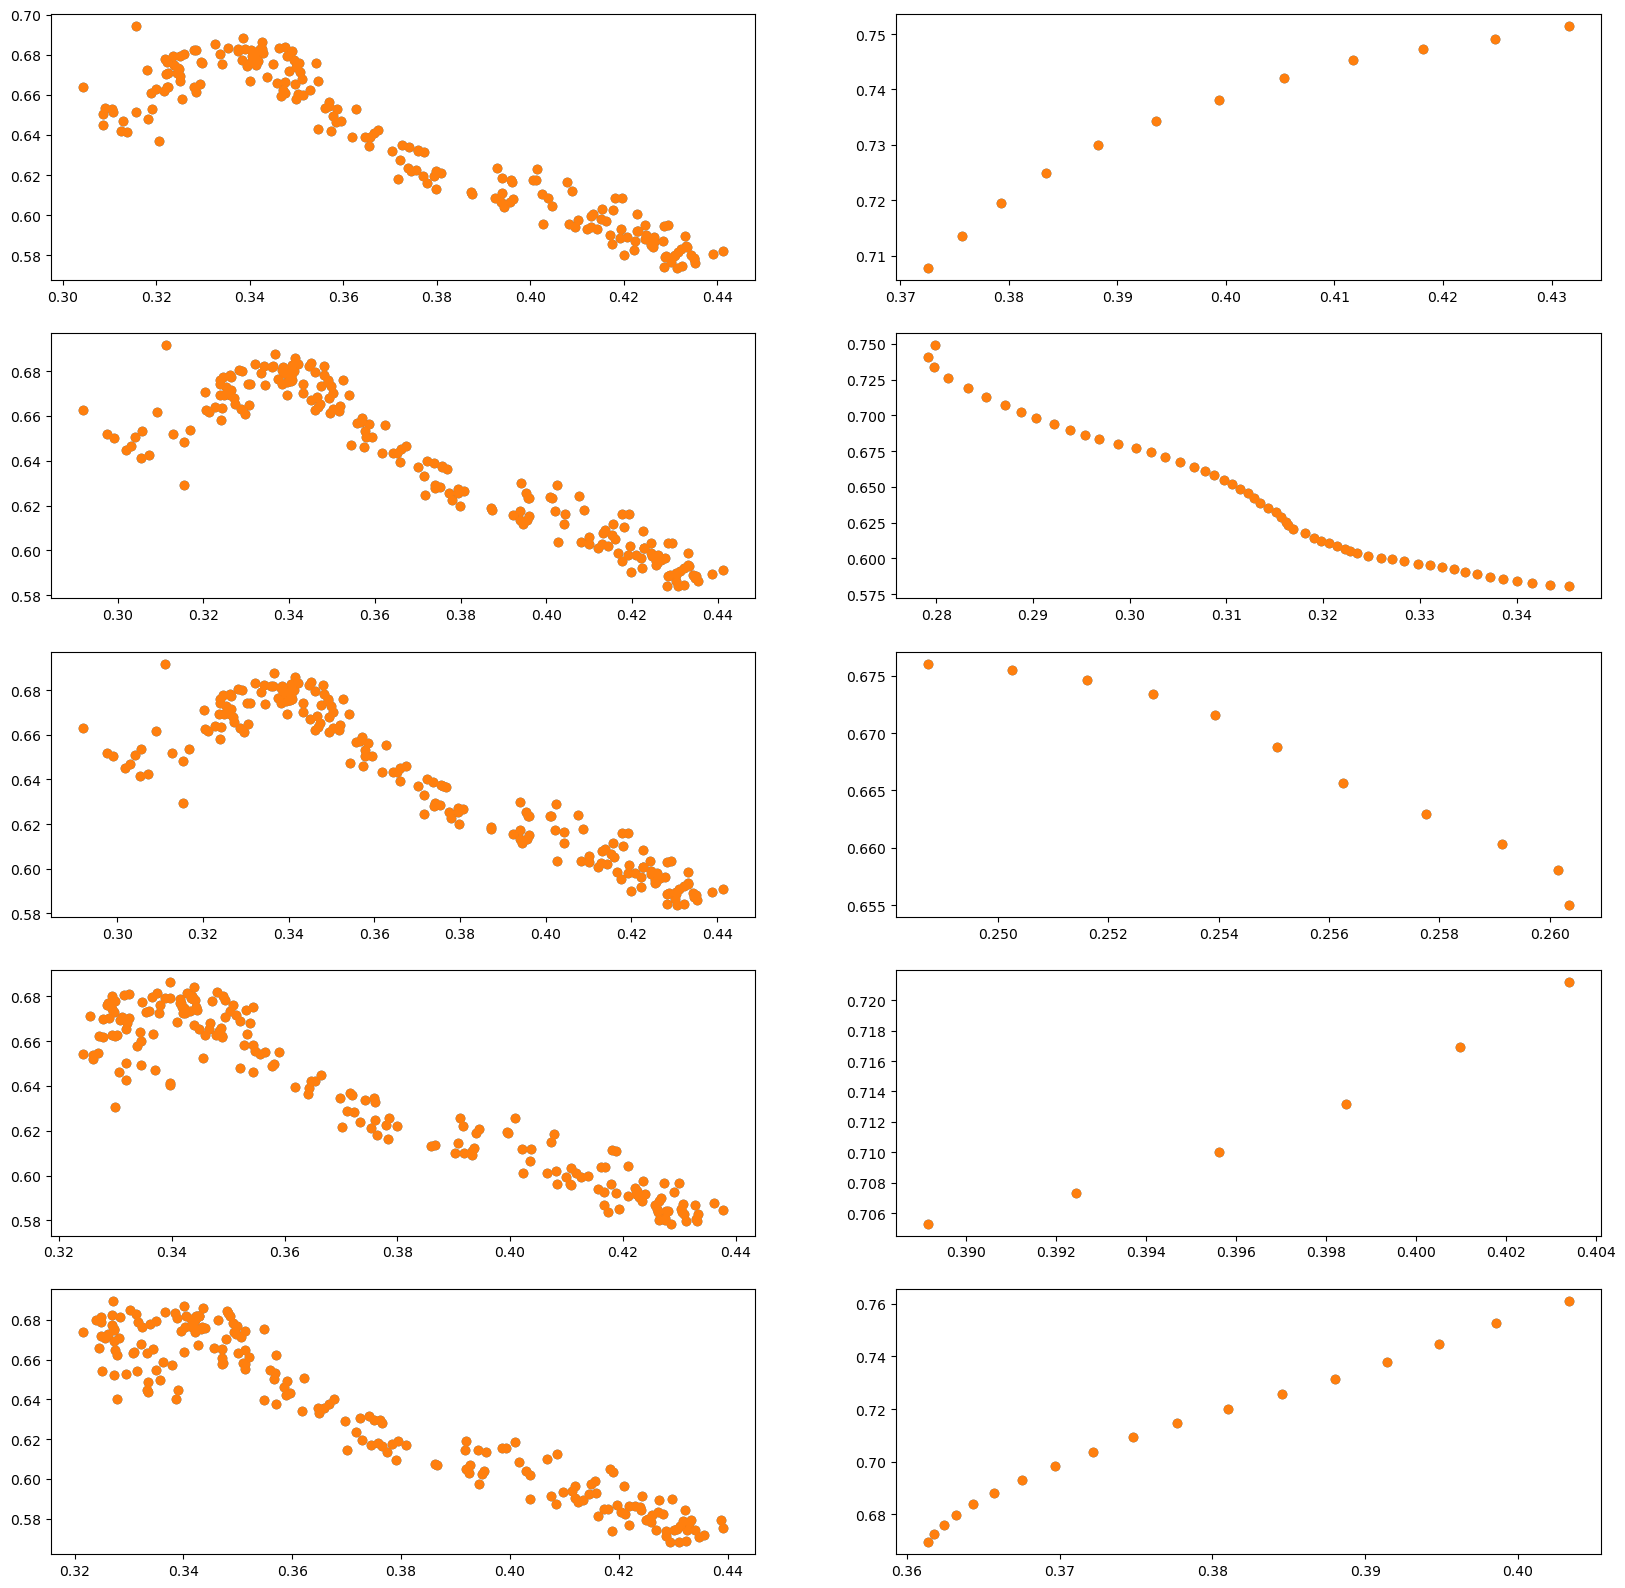

In [47]:
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

for i in range(5):
    ind = torch.randint(0, y.shape[0], (1,)).item()
    for j in range(2):
        ax[i, 0].scatter(y_hat[ind][:,0].cpu().detach().numpy(), y_hat[ind][:,1].cpu().detach().numpy())
        ax[i, 1].scatter(y[ind][0].numpy(), y[ind][1].numpy())